In [1]:
pwd

'/fast/AG_Bunina/Yusuf/jobs'

In [2]:
cd '/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al'

/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al


In [3]:
ls

10_03_24_Authors_episcanpy_tutorial.ipynb*
adata_ATAC_modified.h5ad
adata_ATAC_prepared.h5ad
cistopic_commands.ipynb
cistopic_mallet_modelling_error.ipynb*
cistopic_obj.h5ad
core.25918
core.30746
EpiScanpy_ATAC_preprocess.ipynb*
EpiScanpy_ATAC_preprocess_MODIFIED.ipynb
my_col_names.txt*
my_row_names.txt*
output/
test-jupyter_128G.e7017149
test-jupyter_128G.o7017149
test-jupyter.e7016482
test-jupyter.e7016874
test-jupyter.o7016482
test-jupyter.o7016874
Zhu_et_al/
Zhu_et_al_ATAC_processing.ipynb
Zhu_et_al_ATAC_processing_MODIFIED.ipynb*
Zhu_et_al_peak_count_matrix_preparation_for_python.R
Zhu_et_al_RNA_preprocess.ipynb


In [4]:
import os

hg38_bed_file = output_bed_file = os.path.join("Zhu_et_al", 'data', 'hg38_modified.bed')

In [5]:
import pybedtools

hg38_bed_data = pybedtools.BedTool(hg38_bed_file)

hg38_bed_df = hg38_bed_data.to_dataframe()

In [6]:
hg38_bed_df

,chrom,start,end,name
0,chr10,0,45700,Low Mappability
1,chr10,38481300,38596500,High Signal Region
2,chr10,38782600,38967900,High Signal Region
3,chr10,39901300,41712900,High Signal Region
4,chr10,41838900,42107300,High Signal Region
...,...,...,...,...
631,chrY,4343800,4345800,High Signal Region
632,chrY,10246200,11041200,High Signal Region
633,chrY,11072100,11335300,High Signal Region
634,chrY,11486600,11757800,High Signal Region


In [7]:
import anndata as ad

adata = ad.read("adata_ATAC_modified.h5ad") 

In [8]:
adata

AnnData object with n_obs × n_vars = 45549 × 304034
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [9]:
adata.obs_names

Index(['4_AAACAGCCAACACTTG-1', '4_AAACAGCCACCAAAGG-1', '4_AAACAGCCATAAGTTC-1',
       '4_AAACATGCATAGTCAT-1', '4_AAACATGCATTGTCAG-1', '4_AAACATGCATTGTGAT-1',
       '4_AAACCGCGTCACCTAT-1', '4_AAACCGCGTCAGGAAG-1', '4_AAACCGGCAAGCCACT-1',
       '4_AAACCGGCACATTGCA-1',
       ...
       '150666_TTTGCATTCATGCTCC-1', '150666_TTTGCGACATTTAAGC-1',
       '150666_TTTGGCTGTAATGGAA-1', '150666_TTTGGCTGTGACCTGG-1',
       '150666_TTTGTCTAGGATGATG-1', '150666_TTTGTGAAGACAACAG-1',
       '150666_TTTGTGAAGGCTGTGC-1', '150666_TTTGTGAAGTAAGAAC-1',
       '150666_TTTGTGAAGTCTTGAA-1', '150666_TTTGTTGGTGATCAGC-1'],
      dtype='object', name='index', length=45549)

In [10]:
adata.var_names

Index(['chr1:10063-10327', 'chr1:180726-180979', 'chr1:181323-181566',
       'chr1:190727-191632', 'chr1:777615-779293', 'chr1:779602-779948',
       'chr1:816964-817422', 'chr1:817809-818264', 'chr1:818686-818982',
       'chr1:826700-827679',
       ...
       'chrY:21421948-21422517', 'chrY:21439912-21440212',
       'chrY:21440417-21440769', 'chrY:21481556-21481928',
       'chrY:21602310-21602954', 'chrY:21821571-21822130',
       'chrY:21829019-21829544', 'chrY:26352947-26353241',
       'chrY:26354174-26354520', 'chrY:26670358-26671639'],
      dtype='object', length=304034)

In [11]:
modified_region_names = adata.var_names.tolist()

In [12]:
len(modified_region_names)

304034

In [13]:
modified_region_names[0:5]

['chr1:10063-10327',
 'chr1:180726-180979',
 'chr1:181323-181566',
 'chr1:190727-191632',
 'chr1:777615-779293']

In [14]:
# Find blacklist overlapping regions:

In [15]:
# Change col names:

# import pandas as pd

# Assuming hg38_bed_df is your DataFrame
hg38_bed_df.rename(columns={'chrom': 'Chromosome', 'start': 'Start', 'end': 'End', 'name': 'Name'}, inplace=True)

# Print the DataFrame to verify the changes

print(hg38_bed_df)

    Chromosome     Start       End                Name
0        chr10         0     45700     Low Mappability
1        chr10  38481300  38596500  High Signal Region
2        chr10  38782600  38967900  High Signal Region
3        chr10  39901300  41712900  High Signal Region
4        chr10  41838900  42107300  High Signal Region
..         ...       ...       ...                 ...
631       chrY   4343800   4345800  High Signal Region
632       chrY  10246200  11041200  High Signal Region
633       chrY  11072100  11335300  High Signal Region
634       chrY  11486600  11757800  High Signal Region
635       chrY  26637300  57227400  High Signal Region

[636 rows x 4 columns]


In [17]:
import pyranges as pr

from pycisTopic.cistopic_class import *

# Convert your dataframes to pyranges objects
regions = pr.from_dict(region_names_to_coordinates(modified_region_names))
blacklist = pr.PyRanges(hg38_bed_df)

# Perform the overlap operation to identify blacklisted regions
non_overlap_regions = regions.intersect(blacklist, strandedness=False, invert=True)

# Convert the resulting pyranges object to a dataframe
filtered_regions_df = non_overlap_regions.df

# Print or use the filtered_regions_df dataframe containing regions not overlapping with the blacklist
print(filtered_regions_df)

       Chromosome     Start       End
0            chr1    816964    817422
1            chr1    817809    818264
2            chr1    818686    818982
3            chr1    826700    827679
4            chr1    844454    844654
...           ...       ...       ...
302950       chrY  21602310  21602954
302951       chrY  21821571  21822130
302952       chrY  21829019  21829544
302953       chrY  26352947  26353241
302954       chrY  26354174  26354520

[302955 rows x 3 columns]


In [18]:
filtered_regions_df

,Chromosome,Start,End
0,chr1,816964,817422
1,chr1,817809,818264
2,chr1,818686,818982
3,chr1,826700,827679
4,chr1,844454,844654
...,...,...,...
302950,chrY,21602310,21602954
302951,chrY,21821571,21822130
302952,chrY,21829019,21829544
302953,chrY,26352947,26353241


In [19]:
non_overlap_regions

,Chromosome,Start,End
0,chr1,816964,817422
1,chr1,817809,818264
2,chr1,818686,818982
3,chr1,826700,827679
4,chr1,844454,844654
...,...,...,...
302950,chrY,21602310,21602954
302951,chrY,21821571,21822130
302952,chrY,21829019,21829544
302953,chrY,26352947,26353241


In [20]:
type(non_overlap_regions)

pyranges.pyranges_main.PyRanges

In [21]:
blacklist_filtered_region_names = coord_to_region_names(non_overlap_regions)

In [22]:
len(blacklist_filtered_region_names)

302955

In [23]:
type(blacklist_filtered_region_names)

list

In [24]:
blacklist_filtered_region_names[0:5]

['chr1:816964-817422',
 'chr1:817809-818264',
 'chr1:818686-818982',
 'chr1:826700-827679',
 'chr1:844454-844654']

In [25]:
adata.var_names

Index(['chr1:10063-10327', 'chr1:180726-180979', 'chr1:181323-181566',
       'chr1:190727-191632', 'chr1:777615-779293', 'chr1:779602-779948',
       'chr1:816964-817422', 'chr1:817809-818264', 'chr1:818686-818982',
       'chr1:826700-827679',
       ...
       'chrY:21421948-21422517', 'chrY:21439912-21440212',
       'chrY:21440417-21440769', 'chrY:21481556-21481928',
       'chrY:21602310-21602954', 'chrY:21821571-21822130',
       'chrY:21829019-21829544', 'chrY:26352947-26353241',
       'chrY:26354174-26354520', 'chrY:26670358-26671639'],
      dtype='object', length=304034)

In [26]:
# Create the sparse dataframe:

In [27]:
# Retrieve the trasnposed version of adata.X matrix, since we need cells as colnames :
sparse_matrix = adata.X.transpose()

In [28]:
# Convert the sparse matrix to a sparse pandas DataFrame
sparse_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix)

In [29]:
# Set row names (index)
sparse_df.index = adata.var_names.tolist()

In [30]:
# Set colnames:
sparse_df.columns = adata.obs_names.tolist()

In [31]:
sparse_df

,4_AAACAGCCAACACTTG-1,4_AAACAGCCACCAAAGG-1,4_AAACAGCCATAAGTTC-1,4_AAACATGCATAGTCAT-1,4_AAACATGCATTGTCAG-1,4_AAACATGCATTGTGAT-1,4_AAACCGCGTCACCTAT-1,4_AAACCGCGTCAGGAAG-1,4_AAACCGGCAAGCCACT-1,4_AAACCGGCACATTGCA-1,...,150666_TTTGCATTCATGCTCC-1,150666_TTTGCGACATTTAAGC-1,150666_TTTGGCTGTAATGGAA-1,150666_TTTGGCTGTGACCTGG-1,150666_TTTGTCTAGGATGATG-1,150666_TTTGTGAAGACAACAG-1,150666_TTTGTGAAGGCTGTGC-1,150666_TTTGTGAAGTAAGAAC-1,150666_TTTGTGAAGTCTTGAA-1,150666_TTTGTTGGTGATCAGC-1
chr1:10063-10327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:180726-180979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:181323-181566,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chr1:190727-191632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
chr1:777615-779293,0,0,0,0,1,1,2,0,0,1,...,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:21821571-21822130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:21829019-21829544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:26352947-26353241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:26354174-26354520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Subset the sparse DataFrame based on the list of row names:

subset_df = sparse_df.loc[blacklist_filtered_region_names]

In [33]:
subset_df

,4_AAACAGCCAACACTTG-1,4_AAACAGCCACCAAAGG-1,4_AAACAGCCATAAGTTC-1,4_AAACATGCATAGTCAT-1,4_AAACATGCATTGTCAG-1,4_AAACATGCATTGTGAT-1,4_AAACCGCGTCACCTAT-1,4_AAACCGCGTCAGGAAG-1,4_AAACCGGCAAGCCACT-1,4_AAACCGGCACATTGCA-1,...,150666_TTTGCATTCATGCTCC-1,150666_TTTGCGACATTTAAGC-1,150666_TTTGGCTGTAATGGAA-1,150666_TTTGGCTGTGACCTGG-1,150666_TTTGTCTAGGATGATG-1,150666_TTTGTGAAGACAACAG-1,150666_TTTGTGAAGGCTGTGC-1,150666_TTTGTGAAGTAAGAAC-1,150666_TTTGTGAAGTCTTGAA-1,150666_TTTGTTGGTGATCAGC-1
chr1:816964-817422,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
chr1:817809-818264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:818686-818982,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:826700-827679,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:844454-844654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:21602310-21602954,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:21821571-21822130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:21829019-21829544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:26352947-26353241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Save the sparse DataFrame as a pickle file
with open('sparse_df.pkl', 'wb') as file:
    pickle.dump(subset_df, file)


In [35]:
# I will subsample 1000 cells and 1000 features to test my malet training script:

In [36]:
import session_info

In [38]:
session_info.show()

In [40]:
pwd

'/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al'

In [41]:
sparse_df

,4_AAACAGCCAACACTTG-1,4_AAACAGCCACCAAAGG-1,4_AAACAGCCATAAGTTC-1,4_AAACATGCATAGTCAT-1,4_AAACATGCATTGTCAG-1,4_AAACATGCATTGTGAT-1,4_AAACCGCGTCACCTAT-1,4_AAACCGCGTCAGGAAG-1,4_AAACCGGCAAGCCACT-1,4_AAACCGGCACATTGCA-1,...,150666_TTTGCATTCATGCTCC-1,150666_TTTGCGACATTTAAGC-1,150666_TTTGGCTGTAATGGAA-1,150666_TTTGGCTGTGACCTGG-1,150666_TTTGTCTAGGATGATG-1,150666_TTTGTGAAGACAACAG-1,150666_TTTGTGAAGGCTGTGC-1,150666_TTTGTGAAGTAAGAAC-1,150666_TTTGTGAAGTCTTGAA-1,150666_TTTGTTGGTGATCAGC-1
chr1:10063-10327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:180726-180979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:181323-181566,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
chr1:190727-191632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,1,0,1
chr1:777615-779293,0,0,0,0,1,1,2,0,0,1,...,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:21821571-21822130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:21829019-21829544,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:26352947-26353241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrY:26354174-26354520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
sparse_df.loc["chr1:10063-10327"]

4_AAACAGCCAACACTTG-1         0
4_AAACAGCCACCAAAGG-1         0
4_AAACAGCCATAAGTTC-1         0
4_AAACATGCATAGTCAT-1         0
4_AAACATGCATTGTCAG-1         0
                            ..
150666_TTTGTGAAGACAACAG-1    0
150666_TTTGTGAAGGCTGTGC-1    0
150666_TTTGTGAAGTAAGAAC-1    0
150666_TTTGTGAAGTCTTGAA-1    0
150666_TTTGTTGGTGATCAGC-1    0
Name: chr1:10063-10327, Length: 45549, dtype: Sparse[int64, 0]

In [44]:
sparse_df.loc["chr1:777615-779293", "4_AAACATGCATTGTCAG-1"]

1

In [45]:
sparse_df > 0

,4_AAACAGCCAACACTTG-1,4_AAACAGCCACCAAAGG-1,4_AAACAGCCATAAGTTC-1,4_AAACATGCATAGTCAT-1,4_AAACATGCATTGTCAG-1,4_AAACATGCATTGTGAT-1,4_AAACCGCGTCACCTAT-1,4_AAACCGCGTCAGGAAG-1,4_AAACCGGCAAGCCACT-1,4_AAACCGGCACATTGCA-1,...,150666_TTTGCATTCATGCTCC-1,150666_TTTGCGACATTTAAGC-1,150666_TTTGGCTGTAATGGAA-1,150666_TTTGGCTGTGACCTGG-1,150666_TTTGTCTAGGATGATG-1,150666_TTTGTGAAGACAACAG-1,150666_TTTGTGAAGGCTGTGC-1,150666_TTTGTGAAGTAAGAAC-1,150666_TTTGTGAAGTCTTGAA-1,150666_TTTGTTGGTGATCAGC-1
chr1:10063-10327,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
chr1:180726-180979,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
chr1:181323-181566,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
chr1:190727-191632,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,True
chr1:777615-779293,False,False,False,False,True,True,True,False,False,True,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chrY:21821571-21822130,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
chrY:21829019-21829544,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
chrY:26352947-26353241,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
chrY:26354174-26354520,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [46]:
sparse_df.iloc[1]

4_AAACAGCCAACACTTG-1         0
4_AAACAGCCACCAAAGG-1         0
4_AAACAGCCATAAGTTC-1         0
4_AAACATGCATAGTCAT-1         0
4_AAACATGCATTGTCAG-1         0
                            ..
150666_TTTGTGAAGACAACAG-1    0
150666_TTTGTGAAGGCTGTGC-1    0
150666_TTTGTGAAGTAAGAAC-1    0
150666_TTTGTGAAGTCTTGAA-1    0
150666_TTTGTTGGTGATCAGC-1    0
Name: chr1:180726-180979, Length: 45549, dtype: Sparse[int64, 0]

In [48]:
sparse_df.iloc[:,1]

chr1:10063-10327          0
chr1:180726-180979        0
chr1:181323-181566        0
chr1:190727-191632        0
chr1:777615-779293        0
                         ..
chrY:21821571-21822130    0
chrY:21829019-21829544    0
chrY:26352947-26353241    0
chrY:26354174-26354520    0
chrY:26670358-26671639    0
Name: 4_AAACAGCCACCAAAGG-1, Length: 304034, dtype: Sparse[int64, 0]

In [61]:
sparse_df.shape

(304034, 45549)

In [62]:
sparse_df.shape[0]

304034

In [63]:
sparse_df.shape[1]

45549

In [65]:
sparse_df.sum(axis=0) # this gives colsum

4_AAACAGCCAACACTTG-1          4972
4_AAACAGCCACCAAAGG-1          4964
4_AAACAGCCATAAGTTC-1         13578
4_AAACATGCATAGTCAT-1          5975
4_AAACATGCATTGTCAG-1          5787
                             ...  
150666_TTTGTGAAGACAACAG-1     7531
150666_TTTGTGAAGGCTGTGC-1     7020
150666_TTTGTGAAGTAAGAAC-1     5243
150666_TTTGTGAAGTCTTGAA-1     3685
150666_TTTGTTGGTGATCAGC-1     7998
Length: 45549, dtype: int64

In [66]:
sparse_df.sum(axis=1) # this gives rowsum

chr1:10063-10327           283
chr1:180726-180979         284
chr1:181323-181566         310
chr1:190727-191632        3012
chr1:777615-779293        8154
                          ... 
chrY:21821571-21822130      88
chrY:21829019-21829544     177
chrY:26352947-26353241      73
chrY:26354174-26354520     105
chrY:26670358-26671639    1137
Length: 304034, dtype: int64

In [73]:
sparse_df.loc["chr1:10063-10327",:]

4_AAACAGCCAACACTTG-1         0
4_AAACAGCCACCAAAGG-1         0
4_AAACAGCCATAAGTTC-1         0
4_AAACATGCATAGTCAT-1         0
4_AAACATGCATTGTCAG-1         0
                            ..
150666_TTTGTGAAGACAACAG-1    0
150666_TTTGTGAAGGCTGTGC-1    0
150666_TTTGTGAAGTAAGAAC-1    0
150666_TTTGTGAAGTCTTGAA-1    0
150666_TTTGTTGGTGATCAGC-1    0
Name: chr1:10063-10327, Length: 45549, dtype: Sparse[int64, 0]

In [79]:
rowsum = sparse_df.sum(axis=1)

In [81]:
(rowsum > 0).value_counts()

True    304034
dtype: int64

In [88]:
(rowsum > 1000).value_counts()

False    252894
True      51140
dtype: int64

In [85]:
rowsum

chr1:10063-10327           283
chr1:180726-180979         284
chr1:181323-181566         310
chr1:190727-191632        3012
chr1:777615-779293        8154
                          ... 
chrY:21821571-21822130      88
chrY:21829019-21829544     177
chrY:26352947-26353241      73
chrY:26354174-26354520     105
chrY:26670358-26671639    1137
Length: 304034, dtype: int64

In [86]:
# All rows have non-zero count in at least one cell.

In [87]:
# I will randomly sample 100 cells and 100 rows.

In [93]:
sparse_df.columns[0:5]

Index(['4_AAACAGCCAACACTTG-1', '4_AAACAGCCACCAAAGG-1', '4_AAACAGCCATAAGTTC-1',
       '4_AAACATGCATAGTCAT-1', '4_AAACATGCATTGTCAG-1'],
      dtype='object')

In [96]:
sparse_df.index[0:5]

Index(['chr1:10063-10327', 'chr1:180726-180979', 'chr1:181323-181566',
       'chr1:190727-191632', 'chr1:777615-779293'],
      dtype='object')

In [ ]:
# Randomly sample 100 cols:

In [113]:
sampled_cols = random.sample(sparse_df.columns.tolist(), k=1000)

In [114]:
len(sampled_cols)

1000

In [115]:
sampled_cols[0:5]

['16_ACCAGCTCAAGCGATG-1',
 '8_GTTCACCTCCAGGAAA-1',
 '11_GCGATTTAGAATCGCT-1',
 '4422_CTTCACTCAGCAAATA-1',
 '16_ACACTAATCATGCTCC-1']

In [116]:
# Randomly sample 100 rows:

In [117]:
sampled_rows = random.sample(sparse_df.index.tolist(), k=1000)

In [118]:
sampled_rows[0:5]

['chr3:7402841-7403118',
 'chr1:53413385-53413926',
 'chr1:206278710-206278921',
 'chrX:42900511-42901104',
 'chr5:17428223-17428653']

In [119]:
len(sampled_rows)

1000

In [120]:
sparse_df_subset = sparse_df.loc[sampled_rows, sampled_cols]

In [121]:
sparse_df_subset

,16_ACCAGCTCAAGCGATG-1,8_GTTCACCTCCAGGAAA-1,11_GCGATTTAGAATCGCT-1,4422_CTTCACTCAGCAAATA-1,16_ACACTAATCATGCTCC-1,5977_ACCAAGCGTTAGCGTA-1,6032_AGCCAGTGTTTGCGAA-1,150666_CTGCTCCCAATTGAAG-1,4413_GAGGCCTTCCAGGAAA-1,150656_ACGTTACAGGAAGCTA-1,...,150656_GGACGGATCCGCTAGA-1,5936_GGACATAAGGAGCATA-1,5936_GCTTTACGTTGCACGG-1,4422_ACTAACGGTAGGTTGC-1,5936_TCGATTAAGTTCCCGT-1,16_GGTTGGTGTCATAGAT-1,4413_ATCCACCTCTAACCAA-1,150666_CAAACAACACAACAGG-1,4413_TCGTCAACAACCTGGT-1,150656_ATGACGAAGATAACCC-1
chr3:7402841-7403118,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:53413385-53413926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr1:206278710-206278921,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chrX:42900511-42901104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr5:17428223-17428653,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr4:112981026-112981373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr16:66332665-66333626,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
chr1:57795632-57796223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
chr13:109894822-109895316,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
sparse_df_subset.sum(axis=1) # rowsums: operation is done along the axis 1 so across the cols.

chr3:7402841-7403118          5
chr1:53413385-53413926       17
chr1:206278710-206278921      2
chrX:42900511-42901104        2
chr5:17428223-17428653        6
                             ..
chr4:112981026-112981373      1
chr16:66332665-66333626      26
chr1:57795632-57796223       18
chr13:109894822-109895316     9
chr2:238763354-238763868      4
Length: 1000, dtype: int64

In [124]:
# save the sampled object:

In [125]:
# Save the sparse DataFrame as a pickle file
with open('sparse_df_subset.pkl', 'wb') as file:
    pickle.dump(sparse_df_subset, file)

In [126]:
# generate a cistopic object:

In [127]:
import warnings
warnings.simplefilter(action='ignore')
import pycisTopic
pycisTopic.__version__

'1.0a0'

In [128]:
adata

AnnData object with n_obs × n_vars = 45549 × 304034
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'

In [134]:
type(adata.obs)

pandas.core.frame.DataFrame

In [136]:
adata.obs.loc[sampled_cols,:]

,author_cell_type,age_group,donor_id,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,TSS_percentile,nucleosome_signal,percent_mt,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
index,,,,,,,,,,,,,,,,,,,,,
16_ACCAGCTCAAGCGATG-1,EN-fetal-early,early fetal,EaFet1,3810,1666.0,2056.0,1868.0,0.23,0.904698,0.000000,...,tissue,glutamatergic neuron,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,18th week post-fertilization human stage,H)pBVdvc@@
8_GTTCACCTCCAGGAAA-1,IN-fetal,late fetal,LaFet2,5378,2410.0,396.0,385.0,0.69,0.808421,0.000000,...,tissue,inhibitory interneuron,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,24th week post-fertilization human stage,FB{iKU3u$}
11_GCGATTTAGAATCGCT-1,IN-fetal,early fetal,EaFet2,16513,5136.0,14845.0,11167.0,0.81,0.667948,0.000000,...,tissue,inhibitory interneuron,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,19th week post-fertilization human stage,p&GV(R{wd5
4422_CTTCACTCAGCAAATA-1,Astrocytes,infancy,Inf2,17958,4357.0,6071.0,5232.0,0.46,1.244444,0.159817,...,tissue,astrocyte,10x multiome,normal,Homo sapiens,male,dorsolateral prefrontal cortex,unknown,immature stage,Kg@+qsZRa-
16_ACACTAATCATGCTCC-1,RG,early fetal,EaFet1,5802,2552.0,3130.0,2763.0,0.04,1.021343,0.000000,...,tissue,radial glial cell,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,18th week post-fertilization human stage,6ZHv)Zx0ux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16_GGTTGGTGTCATAGAT-1,RG,early fetal,EaFet1,5116,2550.0,2131.0,1941.0,0.11,0.785509,0.000000,...,tissue,radial glial cell,10x multiome,normal,Homo sapiens,female,cortical plate,unknown,18th week post-fertilization human stage,k0079%S$?c
4413_ATCCACCTCTAACCAA-1,IN-MGE,infancy,Inf1,6091,2760.0,1866.0,1742.0,0.18,0.728600,0.106496,...,tissue,medial ganglionic eminence derived interneuron,10x multiome,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,immature stage,35dfS679FP
150666_CAAACAACACAACAGG-1,Astrocytes,adulthood,Adult1,5128,2081.0,3048.0,2861.0,0.16,1.058824,0.177541,...,tissue,astrocyte,10x multiome,normal,Homo sapiens,female,dorsolateral prefrontal cortex,unknown,20-year-old human stage,scnfF_3*Y|


In [137]:
# Create cisTopic object
from pycisTopic.cistopic_class import *
count_matrix=sparse_df_subset
# path_to_blacklist='/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al/Zhu_et_al/data/hg38-blacklist.v2.bed'
cistopic_obj = create_cistopic_object(fragment_matrix=count_matrix)
# Adding cell information
cell_data =  adata.obs.loc[sampled_cols,:]
cistopic_obj.add_cell_data(cell_data)

2024-03-12 20:35:30,481 cisTopic     INFO     Converting fragment matrix to sparse matrix
2024-03-12 20:35:30,580 cisTopic     INFO     Creating CistopicObject
2024-03-12 20:35:30,656 cisTopic     INFO     Done!


In [138]:
# save the cis object:

In [139]:
with open("cis_object_subset.pkl", "wb") as file:
    pickle.dump(cistopic_obj, file)

In [140]:
ls

10_03_24_Authors_episcanpy_tutorial.ipynb*
12_03_24_cell_subsampling_for_topic_modelling.ipynb*
12_03_24_Sparse_DF_object_generation_from_ATAC_matrix.ipynb
adata_ATAC_modified.h5ad
adata_ATAC_prepared.h5ad
cis_object_subset.pkl
cistopic_commands.ipynb
cistopic_mallet_modelling_error.ipynb*
cistopic_obj.h5ad
core.25918
core.30746
EpiScanpy_ATAC_preprocess.ipynb*
EpiScanpy_ATAC_preprocess_MODIFIED.ipynb
my_col_names.txt*
my_row_names.txt*
output/
sparse_df.pkl
sparse_df_subset.pkl
test-jupyter_128G.e7017149
test-jupyter_128G.o7017149
test-jupyter.e7016482
test-jupyter.e7016874
test-jupyter.o7016482
test-jupyter.o7016874
Zhu_et_al/
Zhu_et_al_ATAC_processing.ipynb
Zhu_et_al_ATAC_processing_MODIFIED.ipynb*
Zhu_et_al_peak_count_matrix_preparation_for_python.R
Zhu_et_al_RNA_preprocess.ipynb


In [141]:
pwd

'/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/Chromatin_and_Gene_Exp/2023_Zhu_et_al/Zhu_et_al_2023/Python_Project/ScenicPlus/Zhu_et_al'

In [142]:
# Malet software could complete the model training on the cis topic object with 1000 x 1000 shape.
# I will read the generated models stored pickle file:

In [143]:
ls

10_03_24_Authors_episcanpy_tutorial.ipynb*
12_03_24_cell_subsampling_for_topic_modelling.ipynb*
12_03_24_Sparse_DF_object_generation_from_ATAC_matrix.ipynb
adata_ATAC_modified.h5ad
adata_ATAC_prepared.h5ad
cis_object_subset.pkl
cistopic_commands.ipynb
cistopic_mallet_modelling_error.ipynb*
cistopic_obj.h5ad
core.25918
core.30746
EpiScanpy_ATAC_preprocess.ipynb*
EpiScanpy_ATAC_preprocess_MODIFIED.ipynb
Mallet_models_500.pkl
my_col_names.txt*
my_row_names.txt*
output/
sparse_df.pkl
sparse_df_subset.pkl
test-jupyter_128G.e7017149
test-jupyter_128G.o7017149
test-jupyter.e7016482
test-jupyter.e7016874
test-jupyter.o7016482
test-jupyter.o7016874
Zhu_et_al/
Zhu_et_al_ATAC_processing.ipynb
Zhu_et_al_ATAC_processing_MODIFIED.ipynb*
Zhu_et_al_peak_count_matrix_preparation_for_python.R
Zhu_et_al_RNA_preprocess.ipynb


In [144]:
# Save the sparse DataFrame as a pickle file
with open('Mallet_models_500.pkl', 'rb') as file:
    Mallet_models = pickle.load(file)

In [145]:
Mallet_models

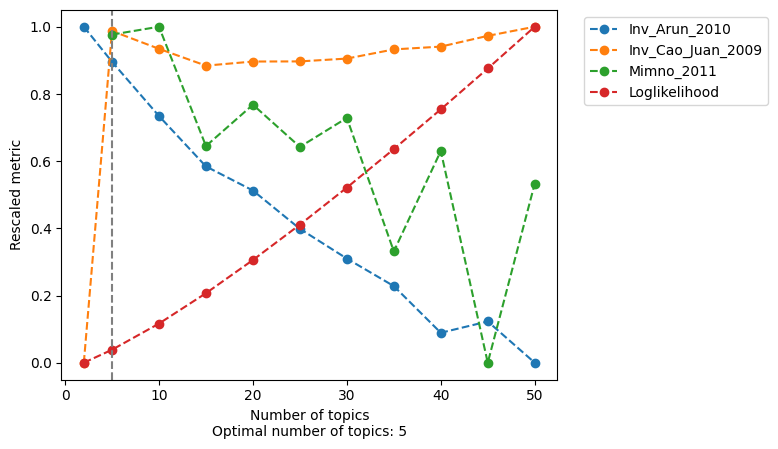

In [148]:
#os.mkdir(outDir+'models')
model=evaluate_models(Mallet_models,
                     select_model=None,
                     return_model=True,
                     metrics=['Arun_2010','Cao_Juan_2009', 'Minmo_2011', 'loglikelihood'],
                     plot_metrics=False,
                     save= 'model_selection.pdf')

In [150]:
# Add model to cisTopicObject
cistopic_obj.add_LDA_model(model)

In [153]:
# Save
# Save
with open('cisTopicObject_subset_w_model.pkl', 'wb') as f:
  pickle.dump(cistopic_obj, f)

In [154]:
# Load cisTopic object
import pickle
infile = open('cisTopicObject_subset_w_model.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

In [155]:
from pycisTopic.clust_vis import *
find_clusters(cistopic_obj,
                 target  = 'cell',
                 k = 10,
                 res = [0.6],
                 prefix = 'pycisTopic_',
                 scale = True,
                 split_pattern = '-')

2024-03-12 21:09:20,855 cisTopic     INFO     Finding neighbours


In [156]:
run_umap(cistopic_obj,
                 target  = 'cell', scale=True)

2024-03-12 21:10:11,087 cisTopic     INFO     Running UMAP


In [157]:
run_tsne(cistopic_obj,
                 target  = 'cell', scale=True)

2024-03-12 21:11:15,914 cisTopic     INFO     Running TSNE


In [159]:
adata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 45549 × 304034
    obs: 'author_cell_type', 'age_group', 'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC', 'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type', 'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    uns: 'batch_condition', 'citation', 'schema_reference', 'schema_version', 'title'
    obsm: 'X_joint_wnn_umap', 'X_umap'>

In [181]:
os.mkdir('cis_object_subset_visualization')
plot_metadata(cistopic_obj,
                 reduction_name='UMAP',
                 variables=['author_cell_type', 'age_group','pycisTopic_leiden_10_0.6'], # Labels from RNA and new clusters
                 target='cell', num_columns=3,
                 text_size=10,
                 dot_size=5,
                 figsize=(15,5),
                 save= 'cis_object_subset_visualization/dimensionality_reduction_label.pdf')

"os.mkdir('cis_object_subset_visualization')\nplot_metadata(cistopic_obj,\n                 reduction_name='UMAP',\n                 variables=['author_cell_type', 'age_group','pycisTopic_leiden_10_0.6'], # Labels from RNA and new clusters\n                 target='cell', num_columns=3,\n                 text_size=10,\n                 dot_size=5,\n                 figsize=(15,5),\n                 save= 'cis_object_subset_visualization/dimensionality_reduction_label.pdf')"

2024-03-12 21:33:51,071 root         WARNING  Some labels are too long, can't fit inside the X axis


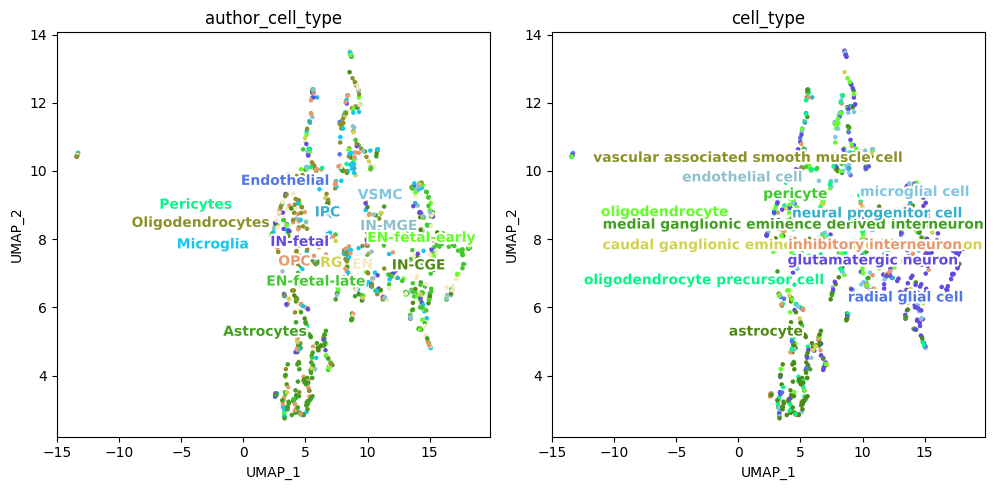

In [183]:
plot_metadata(cistopic_obj,
                 reduction_name='UMAP',
                 variables=['author_cell_type', "cell_type"], # Labels from RNA and new clusters
                 target='cell', num_columns=3,
                 text_size=10,
                 dot_size=5,
                 figsize=(15,5),
                 save= 'cis_object_subset_visualization/dimensionality_reduction_label.pdf')

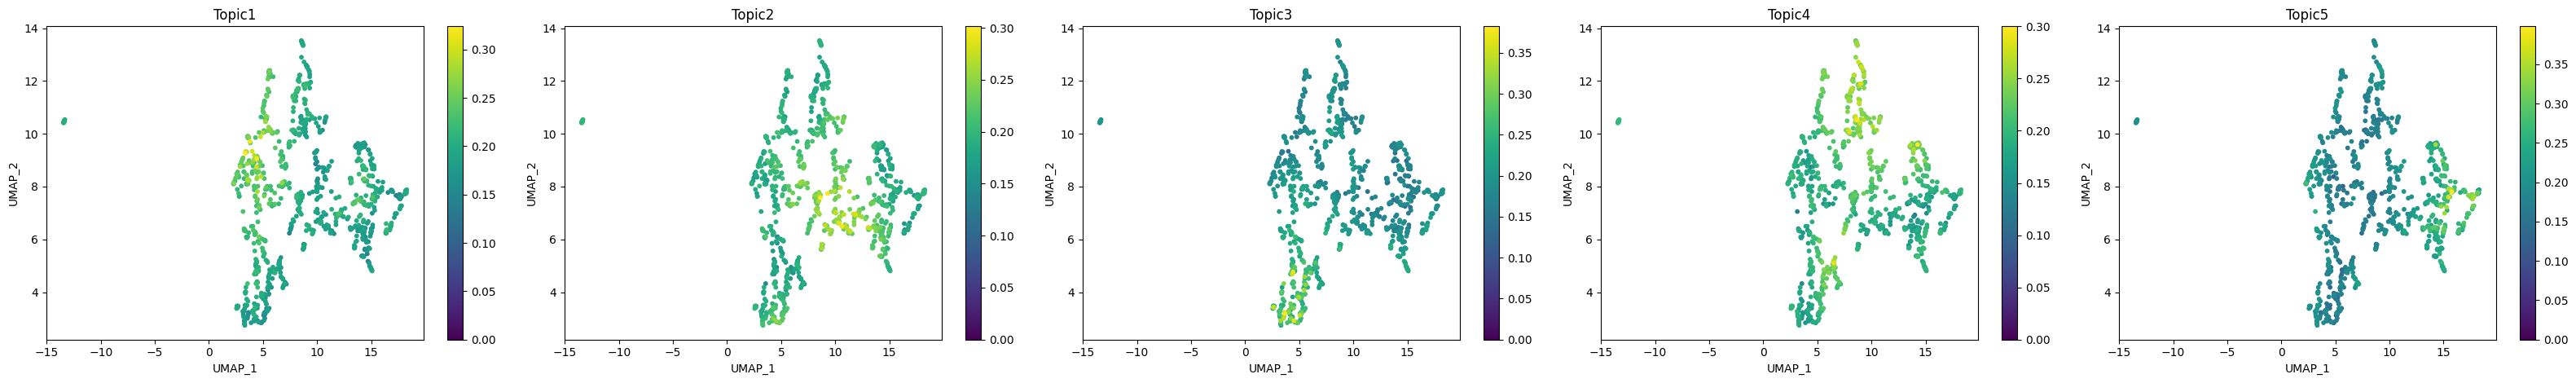

In [161]:
# We can also plot the topic-contributions.

plot_topic(cistopic_obj,
            reduction_name = 'UMAP',
            target = 'cell',
            num_columns=5,
            save= 'cis_object_subset_visualization/dimensionality_reduction_topic_contr.pdf')

In [162]:
# Or we can also draw a heatmap with the topic contributions (and annotations).

In [184]:
cell_topic_heatmap(cistopic_obj,
                     variables = ['author_cell_type', 'age_group'],
                     scale = False,
                     legend_loc_x = 1.05,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,10),
                     save = 'cis_object_subset_visualization/heatmap_topic_contr.pdf')

NotImplementedError: isna is not defined for MultiIndex

In [165]:
cistopic_obj.obs['author_cell_type']

AttributeError: 'CistopicObject' object has no attribute 'obs'

In [185]:
cistopic_obj.cell_data.author_cell_type 

16_ACCAGCTCAAGCGATG-1___cisTopic        EN-fetal-early
8_GTTCACCTCCAGGAAA-1___cisTopic               IN-fetal
11_GCGATTTAGAATCGCT-1___cisTopic              IN-fetal
4422_CTTCACTCAGCAAATA-1___cisTopic          Astrocytes
16_ACACTAATCATGCTCC-1___cisTopic                    RG
                                             ...      
16_GGTTGGTGTCATAGAT-1___cisTopic                    RG
4413_ATCCACCTCTAACCAA-1___cisTopic              IN-MGE
150666_CAAACAACACAACAGG-1___cisTopic        Astrocytes
4413_TCGTCAACAACCTGGT-1___cisTopic                 OPC
150656_ATGACGAAGATAACCC-1___cisTopic               OPC
Name: author_cell_type, Length: 1000, dtype: category
Categories (15, object): ['Astrocytes', 'EN', 'EN-fetal-early', 'EN-fetal-late', ..., 'Oligodendrocytes', 'Pericytes', 'RG', 'VSMC']

In [186]:
cistopic_obj.cell_data.cell_type

16_ACCAGCTCAAGCGATG-1___cisTopic                                  glutamatergic neuron
8_GTTCACCTCCAGGAAA-1___cisTopic                                 inhibitory interneuron
11_GCGATTTAGAATCGCT-1___cisTopic                                inhibitory interneuron
4422_CTTCACTCAGCAAATA-1___cisTopic                                           astrocyte
16_ACACTAATCATGCTCC-1___cisTopic                                     radial glial cell
                                                             ...                      
16_GGTTGGTGTCATAGAT-1___cisTopic                                     radial glial cell
4413_ATCCACCTCTAACCAA-1___cisTopic      medial ganglionic eminence derived interneuron
150666_CAAACAACACAACAGG-1___cisTopic                                         astrocyte
4413_TCGTCAACAACCTGGT-1___cisTopic                      oligodendrocyte precursor cell
150656_ATGACGAAGATAACCC-1___cisTopic                    oligodendrocyte precursor cell
Name: cell_type, Length: 1000, dtype: categ

In [188]:
cistopic_obj.cell_data["author_cell_type"]

16_ACCAGCTCAAGCGATG-1___cisTopic        EN-fetal-early
8_GTTCACCTCCAGGAAA-1___cisTopic               IN-fetal
11_GCGATTTAGAATCGCT-1___cisTopic              IN-fetal
4422_CTTCACTCAGCAAATA-1___cisTopic          Astrocytes
16_ACACTAATCATGCTCC-1___cisTopic                    RG
                                             ...      
16_GGTTGGTGTCATAGAT-1___cisTopic                    RG
4413_ATCCACCTCTAACCAA-1___cisTopic              IN-MGE
150666_CAAACAACACAACAGG-1___cisTopic        Astrocytes
4413_TCGTCAACAACCTGGT-1___cisTopic                 OPC
150656_ATGACGAAGATAACCC-1___cisTopic               OPC
Name: author_cell_type, Length: 1000, dtype: category
Categories (15, object): ['Astrocytes', 'EN', 'EN-fetal-early', 'EN-fetal-late', ..., 'Oligodendrocytes', 'Pericytes', 'RG', 'VSMC']

In [189]:
cistopic_obj.cell_data["author_cell_type_string"] = cistopic_obj.cell_data["author_cell_type"].astype(str)

In [190]:
cistopic_obj.cell_data.columns

Index(['cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc',
       'cisTopic_log_nr_acc', 'sample_id', 'author_cell_type', 'age_group',
       'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC',
       'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt',
       'assay_ontology_term_id', 'cell_type_ontology_term_id',
       'development_stage_ontology_term_id', 'disease_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id',
       'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type',
       'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay',
       'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'observation_joinid', 'pycisTopic_leiden_10_0.6',
       'author_cell_type_string'],
      dtype='object')

In [194]:
cistopic_obj.cell_data["cell_type_string"] = cistopic_obj.cell_data["cell_type"].astype(str)

In [195]:
cistopic_obj.cell_data.columns

Index(['cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc',
       'cisTopic_log_nr_acc', 'sample_id', 'author_cell_type', 'age_group',
       'donor_id', 'nCount_RNA', 'nFeature_RNA', 'nCount_ATAC',
       'nFeature_ATAC', 'TSS_percentile', 'nucleosome_signal', 'percent_mt',
       'assay_ontology_term_id', 'cell_type_ontology_term_id',
       'development_stage_ontology_term_id', 'disease_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id',
       'sex_ontology_term_id', 'tissue_ontology_term_id', 'suspension_type',
       'is_primary_data', 'batch', 'tissue_type', 'cell_type', 'assay',
       'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity',
       'development_stage', 'observation_joinid', 'pycisTopic_leiden_10_0.6',
       'author_cell_type_string', 'cell_type_string'],
      dtype='object')

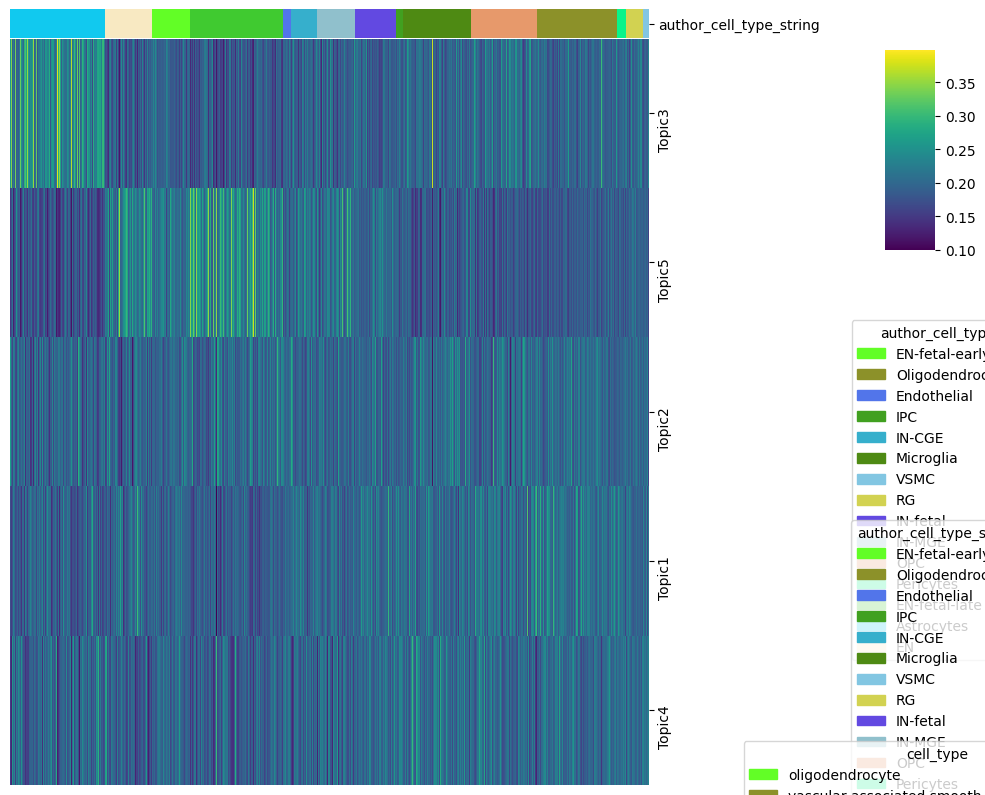

In [197]:
cell_topic_heatmap(cistopic_obj,
                     variables = ['author_cell_type_string'],
                     scale = False,
                     legend_loc_x = 1.05,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,10),
                     save = 'cis_object_subset_visualization/heatmap_topic_contr.pdf')

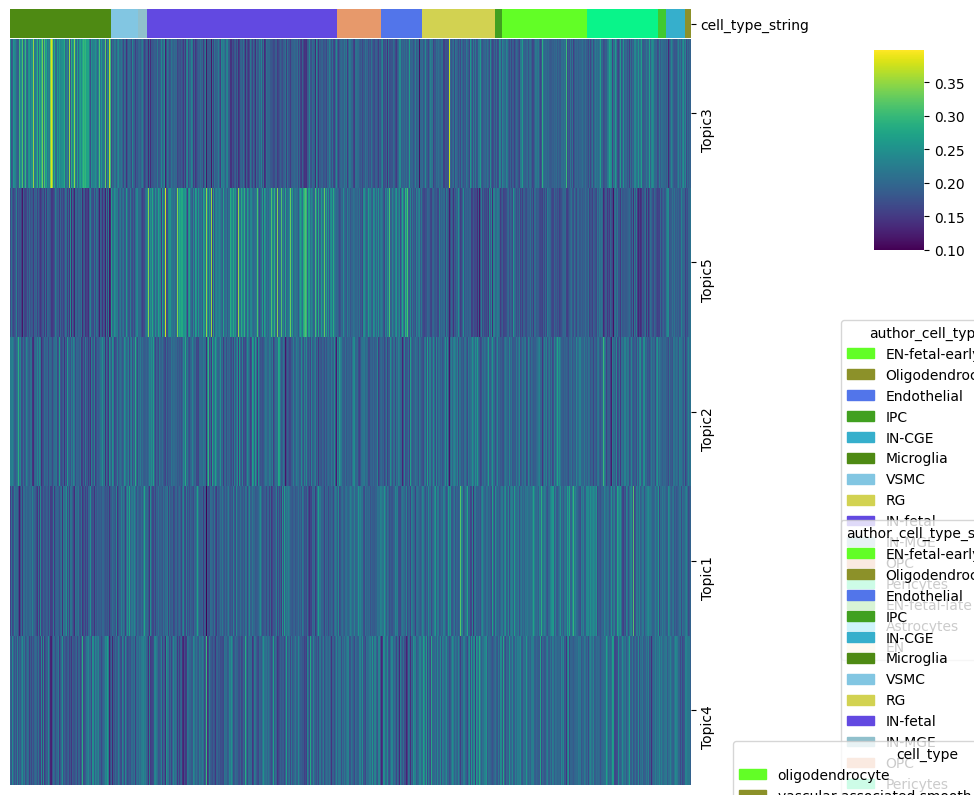

In [198]:
cell_topic_heatmap(cistopic_obj,
                     variables = ['cell_type_string'],
                     scale = False,
                     legend_loc_x = 1.05,
                     legend_loc_y = -1.2,
                     legend_dist_y = -1,
                     figsize=(10,10),
                     save = 'cis_object_subset_visualization/heatmap_topic_contr_w_cell_type.pdf')

In [199]:
# Save
with open('cisTopicObject_subset_w_clusters.pkl', 'wb') as f:
  pickle.dump(cistopic_obj, f)

In [200]:
import session_info

In [202]:
session_info.show()

In [204]:
cp /fast/AG_Bunina/Yusuf/jobs/12_03_24_Sparse_DF_object_generation_from_ATAC_matrix.ipynb 12_03_24_Sparse_DF_object_generation_from_ATAC_matrix.ipynb